In [212]:
import numpy as np
import pandas as pd
import requests
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from matplotlib import pyplot as plt
import datetime as dt 
from sklearn.model_selection import train_test_split

In [322]:
training_set = pd.read_csv('out.csv') # reading csv file
res = []
for i in range(training_set.shape[0]):
    res.append([i+1])

#scale = MinMaxScaler()
y_training = scale.fit_transform(training_set.iloc[:, 0:1])
x1,x2,y1,y2 = train_test_split(res,y_training,train_size=0.9, shuffle=False)
#x_training
#y_training
#training_set
res1= scale.fit_transform(res)
res= scale.fit_transform(res)
res= res.reshape((-1, 1, 1))
x1 = scale.fit_transform(x1)
x1 = x1.reshape((-1, 1, 1))
x2 = scale.fit_transform(x2)
x21 = x2
x2 = x2.reshape((-1, 1, 1))print(x2)

Today Open Value : [0.39662543]
Standard deviation 0.2196036161529539
SAD: 11.878344566233983
SSD: 3.6188885607127372


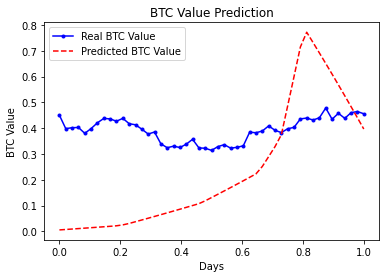

In [324]:
regressor = Sequential()
regressor.add(LSTM(50,activation='relu',input_shape=(1, 1)))
regressor.add(Dense(50,activation='relu'))
regressor.add(Dense(1))
# compile using mean-squared-error loss function
regressor.compile(loss='mean_squared_error', optimizer='adam')
regressor.fit(x1, y1, epochs=1000, batch_size=x1.shape[0], verbose=0)
predicted_price = regressor.predict(x2, batch_size=2);
# Result on MatPlot
plt.plot(x21,y2, color='blue', label='Real BTC Value' , marker = '.')
plt.plot(x21,predicted_price, color='red', label='Predicted BTC Value', linestyle ='dashed')
plt.title('BTC Value Prediction')
plt.xlabel('Days')
plt.ylabel('BTC Value')
plt.legend()
plt.savefig('kp._{:%d%m%Y}.png'.format(today))
today_open = predicted_price[-1]
print("Today Open Value :" , today_open) 
difference = (y2 - predicted_price)
print("Standard deviation",np.std(difference))
print("SAD:", np.sum(np.abs(difference)))
print("SSD:", np.sum(np.square(difference)))
plt.show()